In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
movie = pd.read_csv(r'C:\Users\PRIYAN\Downloads\movies.csv')
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,10329.0,31924.282893,37734.741149,1.0,3240.0,7088.0,59900.0,149532.0


In [7]:
rating=pd.read_csv(r'C:\Users\PRIYAN\Desktop\ratings.csv')
rating

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [9]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,105339.0,3.649245e+02,1.974869e+02,1.0,192.0,3.830000e+02,5.570000e+02,6.680000e+02
movieId,105339.0,1.338131e+04,2.617046e+04,1.0,1073.0,2.497000e+03,5.991000e+03,1.495320e+05
rating,105339.0,3.516850e+00,1.044872e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,105339.0,1.130424e+09,1.802660e+08,828564954.0,971100797.5,1.115154e+09,1.275496e+09,1.452405e+09


In [11]:
df=pd.merge(movie,rating,on='movieId')
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [12]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

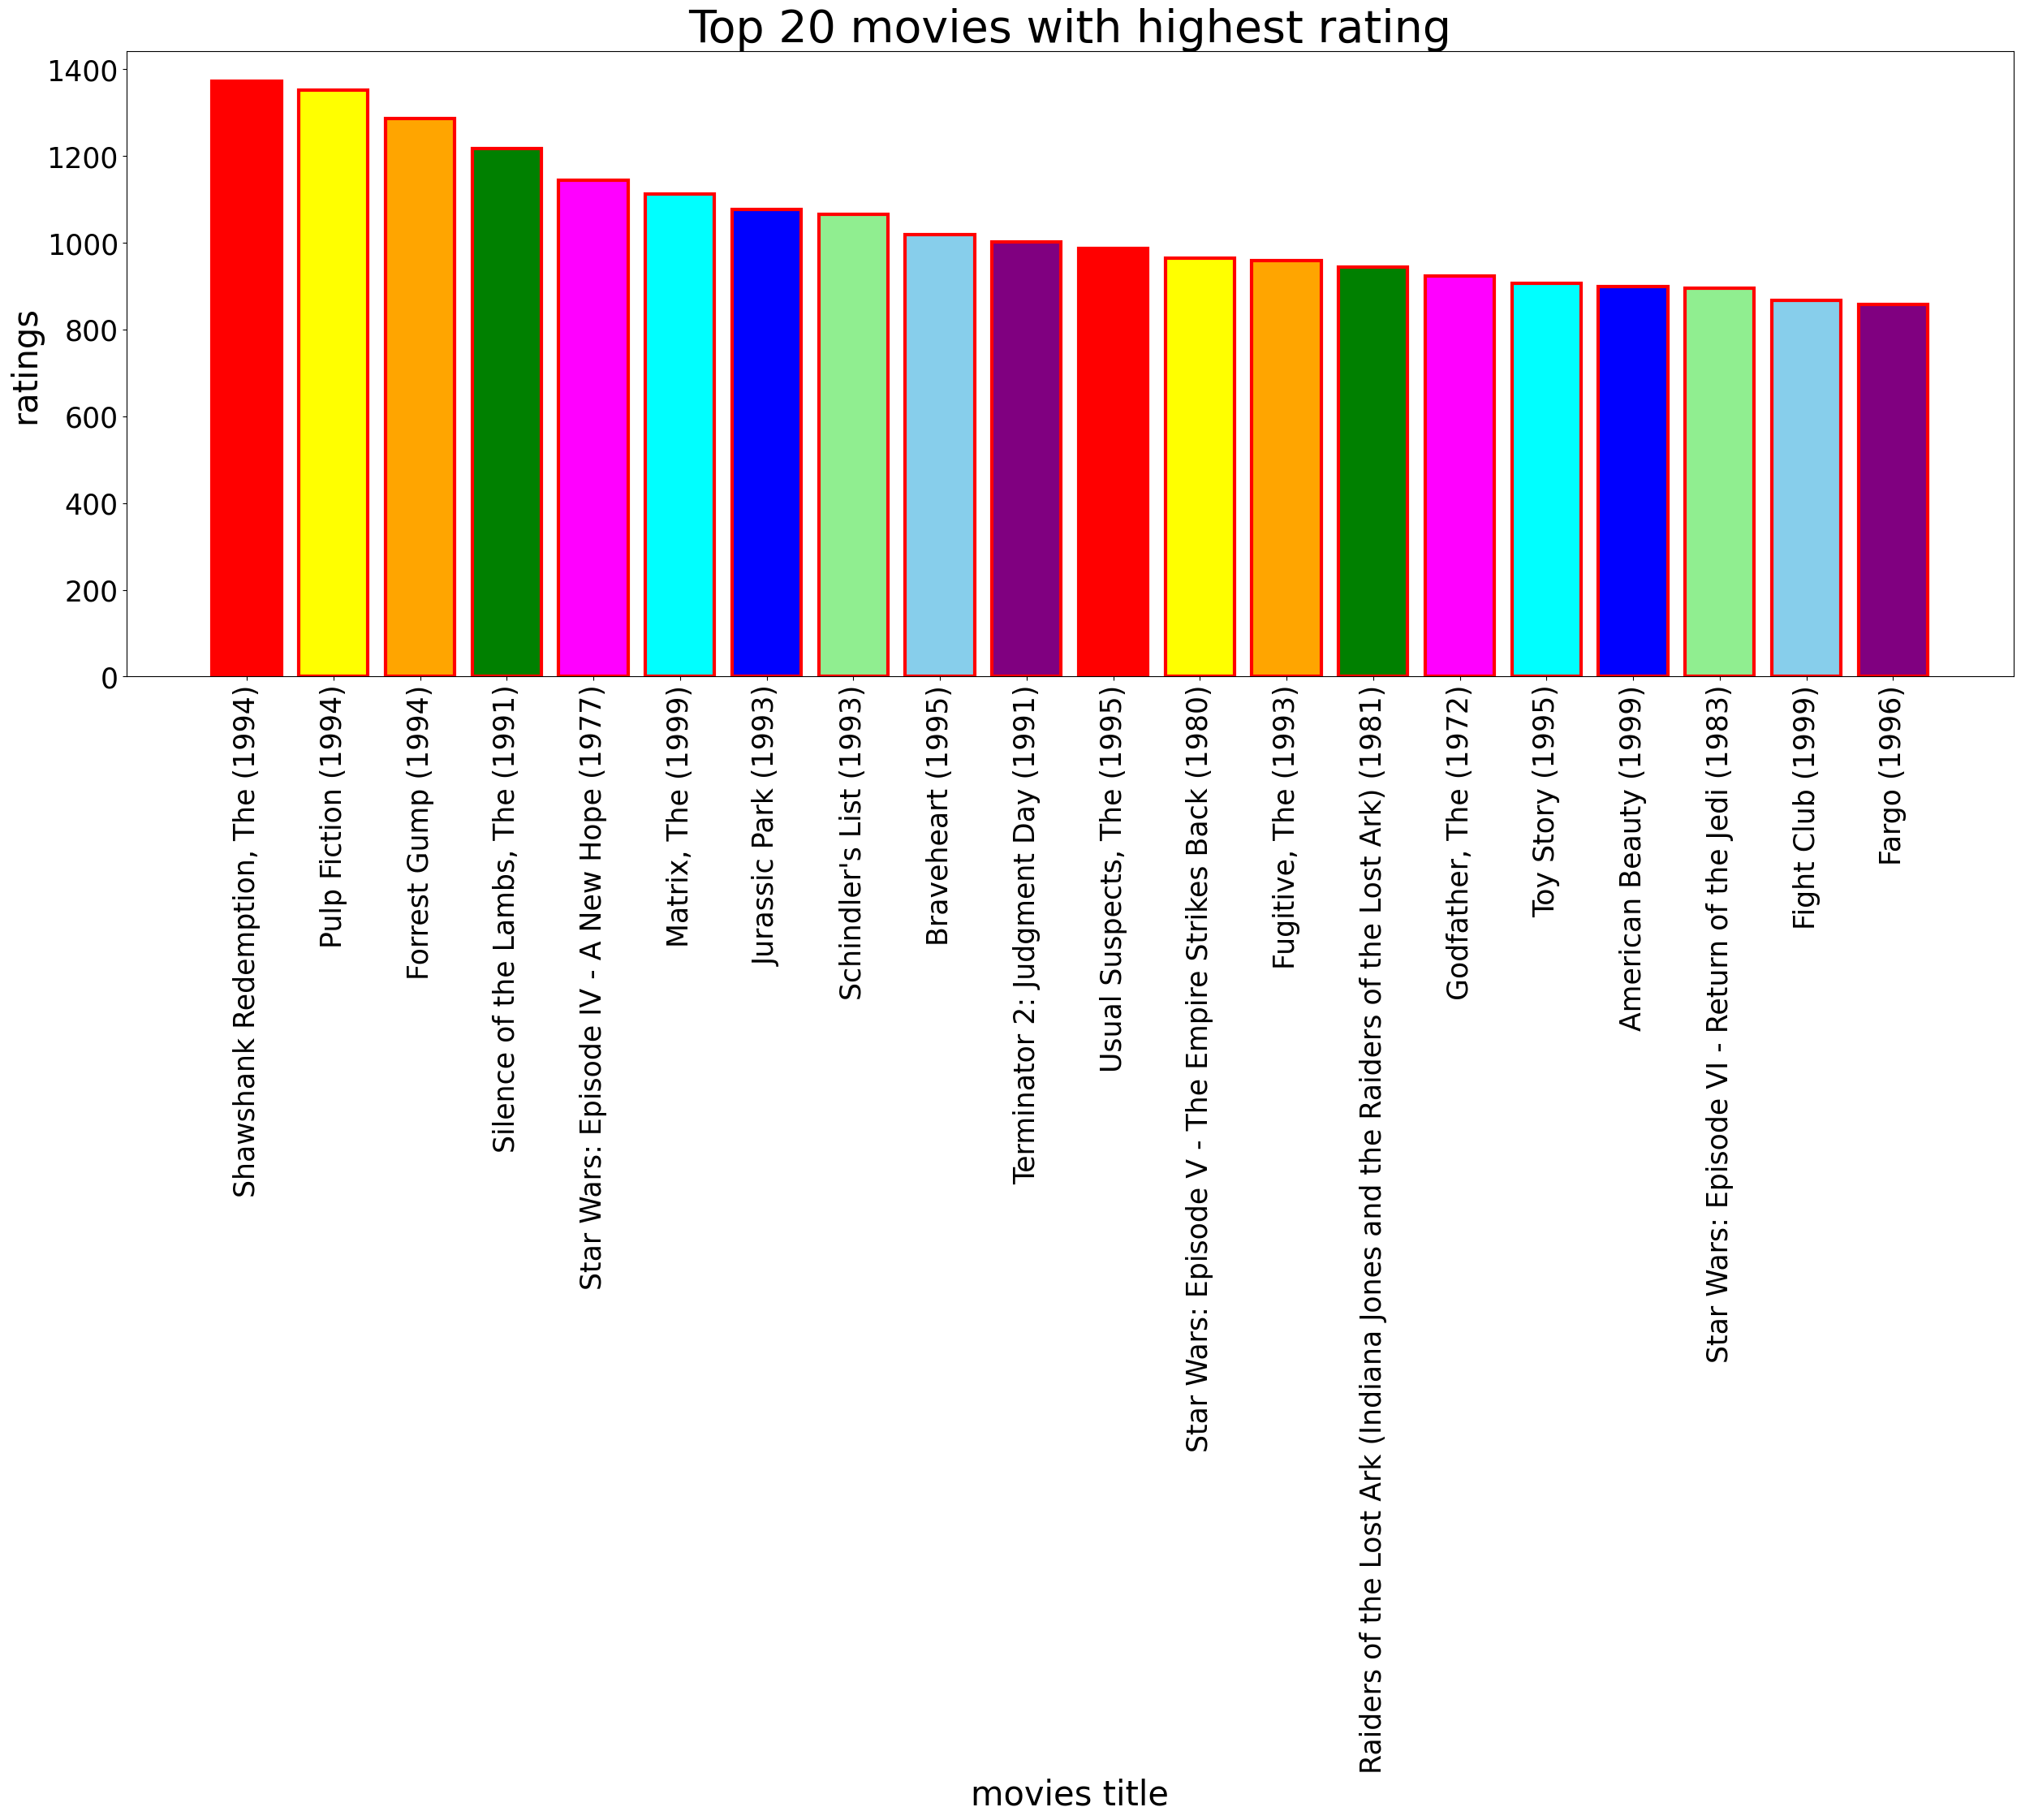

In [13]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [14]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

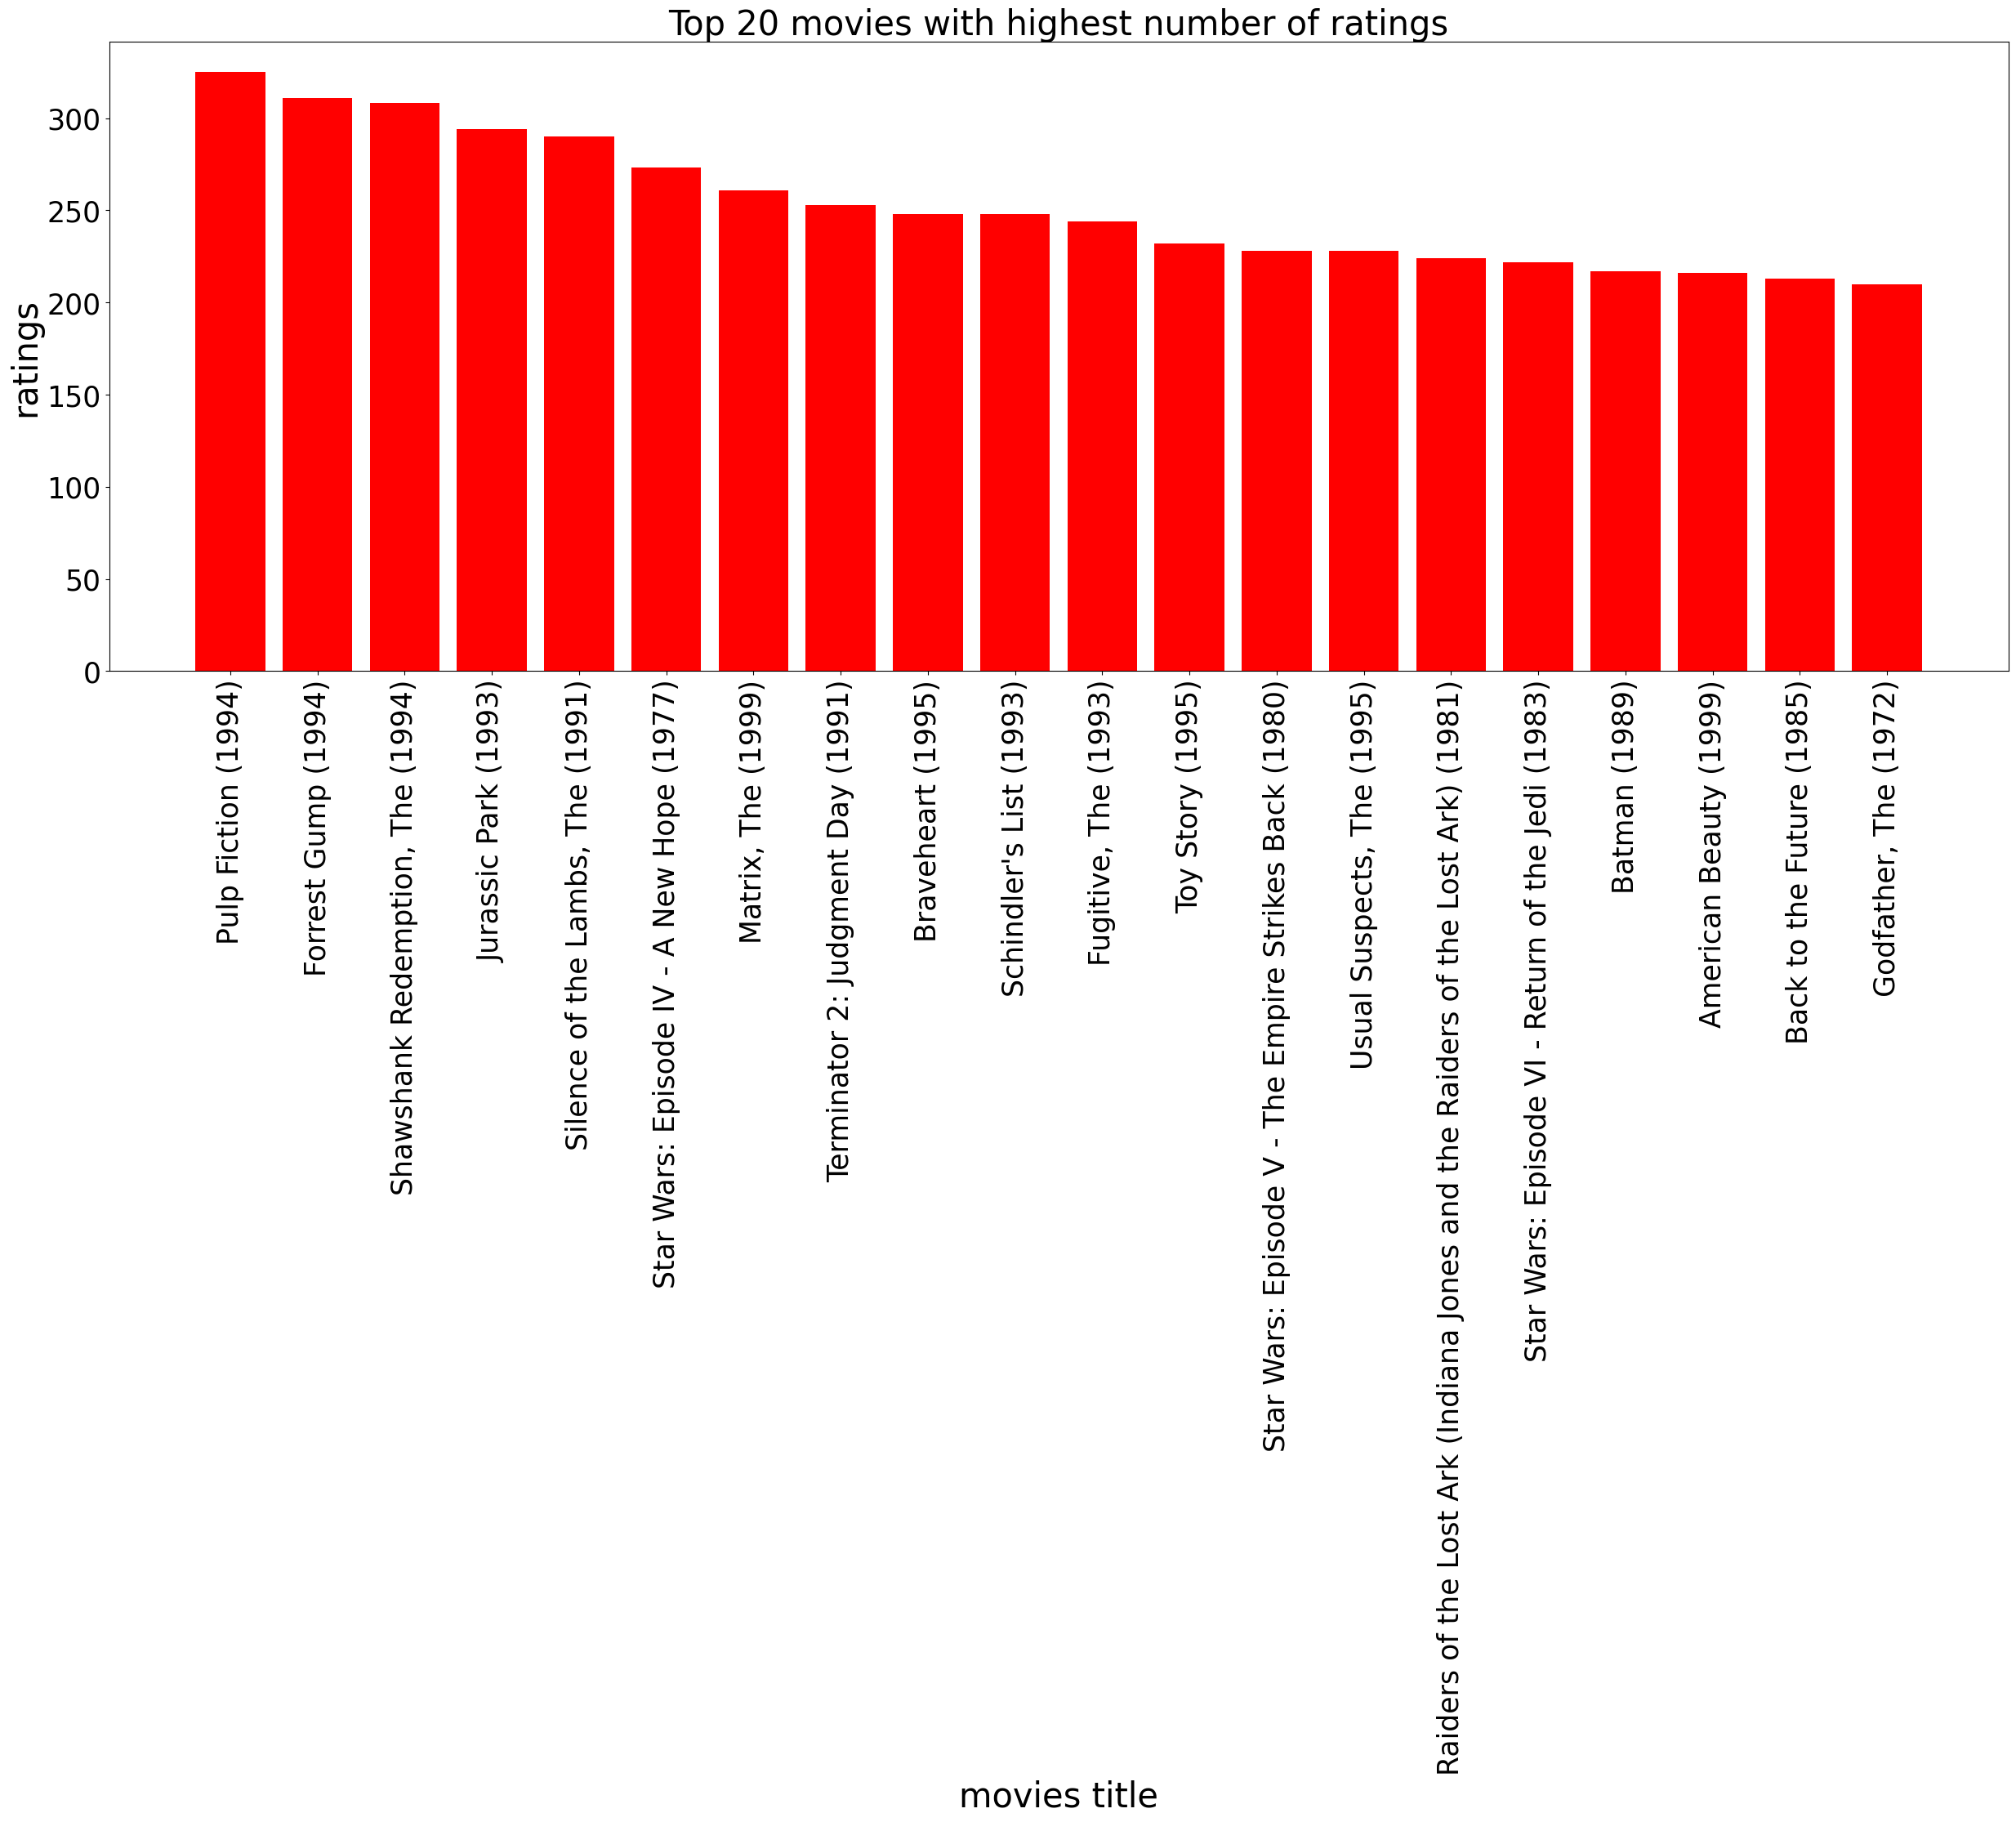

In [15]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [16]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movie['genres'])

In [17]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [19]:
indices=pd.Series(movie.index,index=movie['title'])
titles=movie['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [20]:
recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

In [22]:
import pickle

# Pickling the cosine similarity matrix and indices
with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

with open('indices.pkl', 'wb') as f:
    pickle.dump(indices, f)

with open('titles.pkl', 'wb') as f:
    pickle.dump(titles, f)
